<a href="https://colab.research.google.com/github/SouveekRoy/Detecting-Objects-in-a-video-using-Centroid-Approach-and-Yolov5/blob/master/YOLO5_for_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clone YOLOv5 GitHub Repository

In [1]:
!git clone https://github.com/ultralytics/yolov5  

Cloning into 'yolov5'...
remote: Enumerating objects: 9008, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 9008 (delta 21), reused 22 (delta 8), pack-reused 8963
Receiving objects: 100% (9008/9008), 9.47 MiB | 24.01 MiB/s, done.
Resolving deltas: 100% (6265/6265), done.


# Install dependencies from requirements.txt 

In [2]:
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

/content/yolov5
     |████████████████████████████████| 636 kB 5.3 MB/s 


# Import modules

In [3]:
import torch
from IPython.display import Image, clear_output  # to display images

# print torch version, cuda properties.

In [4]:
clear_output()
print('Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Using torch 1.9.0+cu102 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [5]:
#train
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 3 --data coco128.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1, freeze=0
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-375-gd1182c4 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, shear=0.0, persp

# Detect

`detect.py` runs inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases).

In [6]:
#Object detection from a given image
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/yolov5/data/images/bus.jpg

detect: weights=['yolov5s.pt'], source=/content/yolov5/data/images/bus.jpg, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, tfl_int8=False
YOLOv5 🚀 v5.0-375-gd1182c4 torch 1.9.0+cu102 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7266973 parameters, 0 gradients
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 1 fire hydrant, Done. (0.023s)
Results saved to runs/detect/exp
Done. (0.089s)


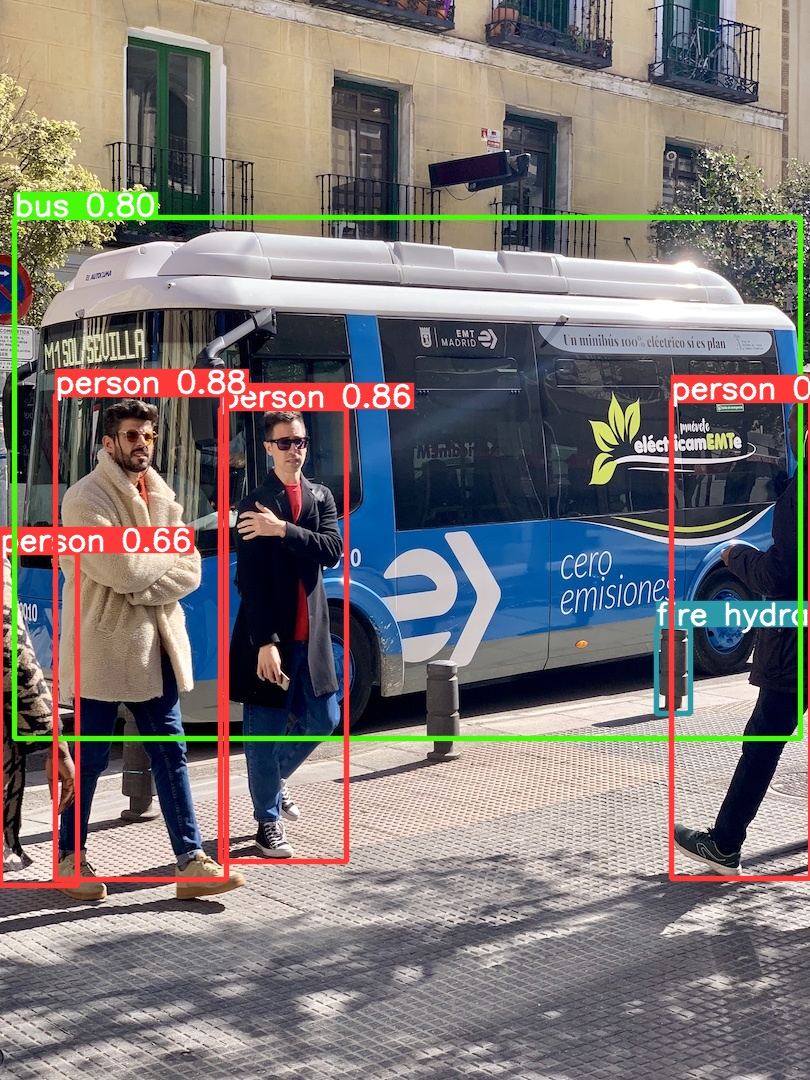

In [7]:
Image(filename='runs/detect/exp/bus.jpg', width=600)

In [ ]:
#Object detection from a given video
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/video.mp4


detect: weights=['yolov5s.pt'], source=/content/video.mp4, imgsz=640, conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False
YOLOv5 🚀 v5.0-309-g264be1a torch 1.9.0+cu102 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7266973 parameters, 0 gradients
video 1/1 (1/321) /content/video.mp4: 384x640